In [2]:
import jieba
import jieba.analyse

jieba.load_userdict('../../dataset/sogou.dic')

In [3]:
%%time
def topNkeywords(N=20, filename='../../dataset/keywords_train.txt', keywords_fn=jieba.analyse.extract_tags):
    top_keywords = []
    actual_keywords = []
    for i, line in enumerate(open(filename)):
        if (i+1) % 100000 == 0:
            break
        summary, text, keywords = line.strip().split('\t')
        topK = keywords_fn(text, topK=N)
        top_keywords.append(topK)
        actual_keywords.append(keywords.split(','))
    return top_keywords, actual_keywords

#top_keywords, actual_keywords = topNkeywords()
#print(len(top_keywords))
#print(len(actual_keywords))

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 18.6 µs


In [17]:
def get_result(top_keywords, actual_keywords, n=5):
    assert len(top_keywords) == len(actual_keywords), 'emm...'
    #assert n <= len(top_keywords[0])
    results = {'precision':[], 'recall':[], 'f1':[]}
    for top, actual in zip(top_keywords, actual_keywords):
        if len(top) == 0 or len(actual) == 0:
            continue
        top = top[:n]
        correct = len(set(top) & set(actual))
        precision = correct / len(top)
        recall = correct / len(actual)
        f1 = 2 * precision * recall / (precision + recall + 1e-6)
        results['precision'].append(precision)
        results['recall'].append(recall)
        results['f1'].append(f1)
    return results
    
#results = get_result(top_keywords, actual_keywords)

In [22]:
# TFIDF 或者 TextRank 提取关键词的结果
def keywords_results(top_keywords, actual_keywords):
    total_results = {'precision':[], 'recall':[], 'f1':[], 'N':[]}
    print('n\tprecision\trecall\tf1')
    for n in range(1,21):
        results = get_result(top_keywords, actual_keywords, n=n)
        precision = sum(results['precision']) / len(results['precision'])
        recall = sum(results['recall']) / len(results['recall'])
        f1 = sum(results['f1']) / len(results['f1'])
        #print('n = %d, precision = %.4f, recall = %.4f, f1 = %.4f' % (n, precision, recall, f1))
        print('%d %.4f %.4f %.4f' % (n, precision, recall, f1))
        total_results['precision'].append(precision)
        total_results['recall'].append(recall)
        total_results['f1'].append(f1)
        total_results['N'].append(n)
    return total_results

In [6]:
%%time
tfidf_top_keywords, tfidf_actual_keywords = topNkeywords(N=20, 
                                                         filename='../../dataset//keywords_train.txt', 
                                                         keywords_fn=jieba.analyse.extract_tags)

CPU times: user 1min 8s, sys: 448 ms, total: 1min 9s
Wall time: 1min 9s


In [23]:
tfidf_results = keywords_results(tfidf_top_keywords, tfidf_actual_keywords)

n	precision	recall	f1
1 0.4818 0.1262 0.1878
2 0.4039 0.2033 0.2513
3 0.3449 0.2545 0.2718
4 0.3017 0.2920 0.2758
5 0.2708 0.3241 0.2750
6 0.2481 0.3534 0.2725
7 0.2305 0.3804 0.2692
8 0.2169 0.4069 0.2661
9 0.2062 0.4328 0.2635
10 0.1973 0.4582 0.2610
11 0.1901 0.4831 0.2588
12 0.1840 0.5082 0.2570
13 0.1786 0.5324 0.2549
14 0.1735 0.5549 0.2525
15 0.1690 0.5773 0.2502
16 0.1648 0.5981 0.2477
17 0.1608 0.6184 0.2451
18 0.1570 0.6377 0.2423
19 0.1535 0.6562 0.2396
20 0.1500 0.6733 0.2365


In [12]:
%%time
top_keywords, actual_keywords = topNkeywords(N=20, filename='../../dataset/keywords_train.txt', keywords_fn=jieba.analyse.textrank)

CPU times: user 7min 19s, sys: 1.03 s, total: 7min 20s
Wall time: 7min 20s


In [18]:
textrank_results = keywords_results(top_keywords, actual_keywords)

n	precision	recall	f1
1	0.3989	0.0993	0.1500
2	0.3294	0.1592	0.2001
3	0.2810	0.2001	0.2176
4	0.2462	0.2307	0.2221
5	0.2216	0.2573	0.2226
6	0.2034	0.2814	0.2213
7	0.1899	0.3045	0.2199
8	0.1794	0.3269	0.2184
9	0.1711	0.3492	0.2171
10	0.1645	0.3710	0.2159
11	0.1591	0.3925	0.2150
12	0.1547	0.4131	0.2141
13	0.1510	0.4326	0.2133
14	0.1480	0.4517	0.2127
15	0.1455	0.4697	0.2122
16	0.1437	0.4866	0.2119
17	0.1421	0.5016	0.2117
18	0.1410	0.5146	0.2115
19	0.1401	0.5260	0.2115
20	0.1396	0.5357	0.2116


In [25]:
keywords = [line.strip().split(' ') for line in open('valid.keywords.txt')]
print(len(keywords))
print('\n'.join([' '.join(s) for s in keywords[-2:]]))

labels = []
i = 0
for line in open('../weibo/src-valid.keywords.txt'): 
    label = line.strip().split(' ')
    label = [w[:-2] for w in label if w[-1] == '1']
    label = list(set(label))
    labels.append(label)
    i = i + 1
    if i == len(keywords):
        break
print(len(labels))
print(labels[-2:])

10151
小姐 中信证券 世界 投行 娶 何许人 张梓琳 迎娶 新郎 员工 高圆圆 追 有戏 聂磊 引爆 副总裁 圈 eng1 高级 债务 资本 瞬间 名叫 消息 市场部 爆料 eng0 人士 感叹 ) 也 ( 到 。 我 ， 的 有 能 ” 啊 ？ 据 “ 目前 是
中国 镜子 设计 彭丽媛 服装 设计师 马可说 里 正视 服装服饰 理解 首次 需求 专人 尝试 女士 适合 符合 审美 对象 提供 价值观 特定 前提 ， 我 这次 其 为 了 自己 的 人 对 。 可以 个人 … 部分 、 所 是 下
10151
[['投行', '员工', '世界', '张梓琳', '小姐', '迎娶'], ['中国', '正视', '彭丽媛', '镜子', '设计师', '里']]


In [26]:
lstm_results = keywords_results(keywords, labels)

n	precision	recall	f1
1 0.6926 0.2416 0.3324
2 0.6071 0.3982 0.4429
3 0.5376 0.5056 0.4808
4 0.4830 0.5881 0.4910
5 0.4393 0.6549 0.4886
6 0.4041 0.7114 0.4808
7 0.3735 0.7573 0.4683
8 0.3466 0.7954 0.4535
9 0.3221 0.8258 0.4366
10 0.3010 0.8526 0.4205
11 0.2818 0.8735 0.4037
12 0.2648 0.8923 0.3879
13 0.2495 0.9076 0.3726
14 0.2359 0.9216 0.3583
15 0.2233 0.9326 0.3444
16 0.2123 0.9433 0.3317
17 0.2019 0.9513 0.3193
18 0.1925 0.9589 0.3079
19 0.1839 0.9654 0.2970
20 0.1759 0.9712 0.2868


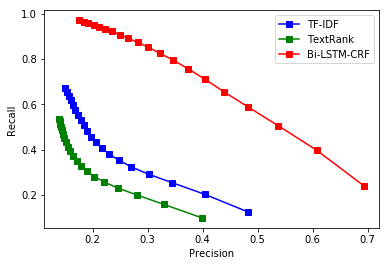

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
plt.plot(tfidf_results['precision'], tfidf_results['recall'],'bs-', label='TF-IDF')
plt.plot(textrank_results['precision'], textrank_results['recall'],'gs-', label='TextRank')
plt.plot(lstm_results['precision'], lstm_results['recall'],'rs-', label='Bi-LSTM-CRF')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.show()